<a href="https://colab.research.google.com/github/shangab/AIProjects/blob/Mnist_NN_Demo/Mnist_NN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
idx= 22
plt.imshow(x_test[idx])
print(y_test[idx])





In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
x_train_scaled=x_train/255
x_test_scaled= x_test/255

In [40]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0410 - accuracy: 0.9874
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0285 - accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9939


In [42]:
predictions= model.predict(x_test_scaled)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([2.7285092e-05, 1.6475932e-03, 1.0288861e-02, 8.6347216e-01,
       2.5374152e-09, 3.4836989e-03, 1.6695057e-11, 9.9999946e-01,
       1.4627185e-02, 1.3712214e-01], dtype=float32)

In [43]:
predictions_lbl = [np.argmax(x) for x in predictions]
predictions_lbl[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

<Axes: >

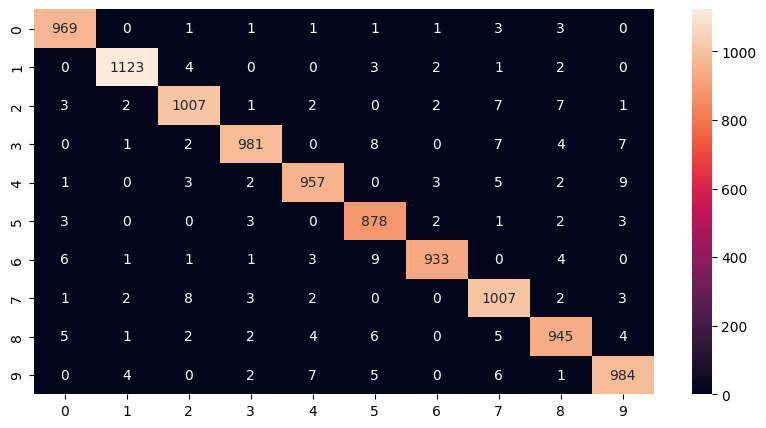

In [44]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions_lbl)
plt.figure(figsize=(10,5))
sb.heatmap(cm,annot=True, fmt='d')
